# Ensemble by Voting

**Voting and Ensembles**

Voting is a fundamental approach for combining multiple classifiers, where each learner contributes to the final decision. This method is known as an ensemble, and the combination process often involves averaging the outputs of individual classifiers. In its simplest form, voting gives equal weight to each classifier. However, other combination rules can be applied to achieve more sophisticated results. These rules are particularly important when the outputs are not posterior probabilities, as they require normalization to ensure consistent scaling across different classifiers.

It seems like you're asking for a corrected version of a formula or text related to ensemble voting methods. Here's a revised version of the content:

_linear combination of the learners:_

$$
y_i = \sum_{j} w_j d_{ji} \quad \text{where} \quad w_j \geq 0 \quad \text{and} \quad \sum_{j} w_j = 1
$$

![VotingWeighted_1](../EnsembleLearning/EnsembleLearningImage/Voting_weighted.png)



## Type of nontrainable voting 

Classifier combination rules (Voting):

**Classifier Combination Rules**

| **Rule**         | **Fusion Function $ f(\cdot) $**                                  |
|------------------|-------------------------------------------------------------------|
| **Sum**          | $ y_i = \frac{1}{L} \sum_{j=1}^{L} d_{ji} $                      |
| **Weighted Sum** | $ y_i = \sum_{j} w_j d_{ji}, \quad w_j \geq 0, \quad \sum_{j} w_j = 1 $ |
| **Median**       | $ y_i = \text{median}_j \{ d_{ji} \} $                           |
| **Minimum**      | $ y_i = \min_j \{ d_{ji} \} $                                    |
| **Maximum**      | $ y_i = \max_j \{ d_{ji} \} $                                    |
| **Product**      | $ y_i = \prod_{j} d_{ji} $                                       |


### Example for voting

**Example of Combination Rules on Three Learners and Three Classes**

| **Class** | **Learner 1 ($d_1$)** | **Learner 2 ($d_2$)** | **Learner 3 ($d_3$)** | **Sum** | **Median** | **Minimum** | **Maximum** | **Product** |
|:---------:|:-----------------------:|:-----------------------:|:-----------------------:|:-------:|:----------:|:------------:|:------------:|:------------:|
| **C1**    | 0.2                     | 0.0                     | 0.4                     | 0.2     | 0.2        | 0.0          | 0.4          | 0.0          |
| **C2**    | 0.5                     | 0.6                     | 0.4                     | 0.5     | 0.5        | 0.4          | 0.6          | 0.12         |
| **C3**    | 0.3                     | 0.4                     | 0.2                     | 0.3     | 0.3        | 0.2          | 0.4          | 0.032        |



## Bayesian model combination

Bayesian model combination views voting schemes as approximations within a Bayesian framework, where weights represent prior model probabilities and decisions approximate model-conditional likelihoods. In classification, simple voting corresponds to a uniform prior. A prior distribution favoring simpler models gives them larger weights. Rather than integrating over all models, a subset of high-probability models is selected. 

In classification, we have:

- $ w_j \equiv P(M_j) $
- $ d_{ji} = P(C_i \mid x, M_j) $

Equation 17.2 corresponds to:

$$
P(C_i \mid x) = \sum_{\text{all models } M_j} P(C_i \mid x, M_j) P(M_j)
$$

This formula represents the probability of class $ C_i $ given the input $ x $ as a weighted sum of the probabilities of class $ C_i $ given the model $ M_j $ and the probability of each model $ M_j $.


## Mean-Vriance of voting 

Assume that the $ d_j $ are independent and identically distributed (iid) with expected value $ E[d_j] $ and variance $ \text{Var}(d_j) $. When taking a simple average with $ w_j = \frac{1}{L} $, the expected value and variance of the output $ y $ are:

$$
E[y] = E\left[\frac{1}{L} \sum_{j=1}^{L} d_j \right] = \frac{1}{L} \sum_{j=1}^{L} E[d_j] = E[d_j]
$$

$$
\text{Var}(y) = \text{Var}\left(\frac{1}{L} \sum_{j=1}^{L} d_j \right) = \frac{1}{L^2} \sum_{j=1}^{L} \text{Var}(d_j) = \frac{1}{L} \text{Var}(d_j)
$$

Thus, the expected value remains unchanged, so the bias does not change. However, the variance, and therefore the mean square error, decreases as the number of independent voters $ L $ increases. In the general case:

$$
\text{Var}(y) = \frac{1}{L^2} \sum_{j=1}^{L} \text{Var}(d_j) + \frac{2}{L^2} \sum_{j < i} \text{Cov}(d_j, d_i)
$$


## miniproject: Evaluate Voting Performance with Various Classifiers

Test the voting method without training using different classifiers and combinations. Compare the results of each classifier in terms of mean and variance. Analyze and conclude based on these comparisons.


## Why combination works

Combining classifiers introduces an additional layer that enhances performance by aggregating multiple weak classifiers, offering simplicity and aggregation benefits, even as it adds complexity and potentially shifts focus from optimizing individual models.

### mitigate the risk of choosing an inadequate model

Given a labeled dataset $ Z $ and several classifiers with strong performance on $ Z $, selecting a single classifier may risk suboptimal performance due to variability in generalization. 

For instance, classifiers such as 1-NN or decision trees may show zero resubstitution error on different feature subsets but vary in their generalization ability. Instead of relying on a single classifier, combining their outputs through an averaging approach can _mitigate the risk of choosing an inadequate model_.

Dietterich illustrates this approach with a diagram where the *outer circle represents all possible classifiers*, and the **shaded inner region** indicates those with **good training performance.** The **ideal classifier $ D $**, which also performs well on training data, is hoped to be approximated more closely by ***aggregating the $ L $ classifiers*** rather than selecting a single classifier at random.

![Dietterich_1](../EnsembleLearning/EnsembleLearningImage/Dietterich1.PNG)

Training algorithms such as hill-climbing or random search can lead to different local optima when training classifiers. This situation is illustrated in following Figure, where each individual classifier starts at various points in the classifier space and ends up closer to the optimal classifier $ D $. By aggregating multiple classifiers, we can potentially create a new classifier that better approximates $ D $ than any individual classifier $ D_i $ could on its own.

![Dietterich_2](../EnsembleLearning/EnsembleLearningImage/Dietterich2.PNG)

**Classifier Space Limitation:** The classifier space we select may not include the optimal classifier for a problem. For example, if the optimal model is nonlinear but we limit our classifiers to linear ones, we won't find the best solution in this restricted space.

**Ensemble Advantage:** Despite this limitation, an ensemble of linear classifiers can approximate any decision boundary with high accuracy. If the optimal classifier 
𝐷 is outside the chosen classifier space, using an ensemble might be more practical than training a complex individual model.

**Complex Models vs. Ensembles:** Training a single neural network with numerous parameters can be difficult. An ensemble of simpler classifiers might be easier to train and can perform better in some cases.

![Dietterich_3](../EnsembleLearning/EnsembleLearningImage/Dietterich3.PNG)
 

### Different level of combination

![Different level of combination1](../EnsembleLearning/EnsembleLearningImage/DifferentLevelOfCombination1.PNG)



### Confusion matrix 

A _confusion matrix_ is a table used to evaluate the performance of a classification model by comparing the predicted classifications to the actual ground truth. It helps to understand the types of errors the model is making and provides insights into its performance across different classes.

#### Structure of the Confusion Matrix

| **Actual Condition** | **Predicted Positive (PP)** | **Predicted Negative (PN)** |
|----------------------|------------------------------|------------------------------|
| **Positive (P)**     | True Positive (TP)           | False Negative (FN)          |
| **Negative (N)**     | False Positive (FP)          | True Negative (TN)           |


A confusion matrix is a useful tool for visualizing the performance of a classification algorithm. It provides a detailed breakdown of how many instances of each class were correctly or incorrectly classified. Here's a more detailed description:

#### Definitions:
- **True Positive (TP):** The number of instances correctly predicted as positive.
- **False Negative (FN):** The number of actual positive instances that were incorrectly predicted as negative.
- **False Positive (FP):** The number of actual negative instances that were incorrectly predicted as positive.
- **True Negative (TN):** The number of instances correctly predicted as negative.

#### Key Metrics Derived from the Confusion Matrix:

- **Accuracy:** Measures the overall correctness of the model.
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precision:** Measures the accuracy of positive predictions.
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall (Sensitivity):** Measures the ability of the model to find all positive instances.
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1 Score:** The harmonic mean of precision and recall, useful for imbalanced classes.
  $$
  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

Simplify the formula for the F1 score:

$$
\text{F1 Score} = \frac{2 \times TP}{2 \times TP + FN + FP}
$$

$$
\text{F1 Score} = \frac{TP}{TP + \frac{FN + FP}{2}}
$$

$\frac{FN + FP}{2}$ reflects the average errors of the classifier.

![F1_score_1](../EnsembleLearning/EnsembleLearningImage/F1score_1.PNG)

### From Confusion Matrix to combination of classifier

For each classifier $ D_i $, a confusion matrix $ \text{CM}_i $ is calculated by applying $ D_i $ to the training dataset. The $(k, s)$ th entry of this matrix, $ \text{cm}^{i}_{k,s} $, represents the number of instances in the dataset whose true class label was $ \omega _k $ and were assigned by $ D_i $ to class $ \omega_s $. Let $ N_{\omega_s} $ denote the total number of instances from class $ \omega_s $ in the dataset. Using $ \text{cm}^{i}_{k,s} $ as an estimate of the probability $ P(s_i \mid \omega_k) $, and $ N_{\omega_k} $ as an estimate of the prior probability for class $ \omega_k $. 

### Naive Bayes Combination

#### Overview
The Naive Bayes combination method aggregates the outputs of multiple classifiers under the assumption that they are conditionally independent given the true class label. This method simplifies the integration of classifier outputs by treating each classifier's contribution independently.

#### Assumptions
- **Conditional Independence:** Each classifier is assumed to be conditionally independent of the others given the true class label $\omega_k$. This means that once the true class label is known, the predictions made by different classifiers are independent of each other.

#### Notation
- $s = [s_1, s_2, \ldots, s_L]^T$: Vector of labels predicted by the ensemble of $L$ classifiers.
  - $s_i \in \mathcal{S}$: The label suggested for the sample by classifier $D_i$.
- $P(s_j \mid \omega_k)$: Probability that classifier $D_j$ assigns the sample to class $s_j$ given that the true class is $\omega_k$.
- $P(\omega_k)$: Prior probability of class $\omega_k$.
- $P(s)$: Total probability of the predictions across all classifiers.

#### Formula Derivations

1. **Joint Probability:**
   Given the true class label $\omega_k$, the joint probability of all classifiers assigning the sample to classes $s_1, s_2, \ldots, s_L$ is:
   $$
   P(s_1, s_2, \ldots, s_L \mid \omega_k) = \prod_{i=1}^{L} P(s_i \mid \omega_k)
   $$
   This formula utilizes the assumption of conditional independence among classifiers.

2. **Posterior Probability:**
   The posterior probability of class $\omega_k$ given the observed predictions $s$ is:
   $$
   P(\omega_k \mid s) = \frac{P(\omega_k) \cdot P(s \mid \omega_k)}{P(s)}
   $$
   Since $P(s)$ is constant for all classes, it does not affect the relative probabilities. Thus:
   $$
   P(\omega_k \mid s) \propto P(\omega_k) \cdot \prod_{i=1}^{L} P(s_i \mid \omega_k)
   $$

3. **Support for Class $\omega_k$:**
   To calculate the support for class $\omega_k$, we use:
   $$
   \text{Support}_{\omega_k}(x) \propto P(\omega_k) \cdot \prod_{i=1}^{L} P(s_i \mid \omega_k)
   $$
   This combines the prior probability of class $\omega_k$ with the product of the probabilities assigned by each classifier.


$$
\text{Support}_{\omega_k}(x) \propto \frac{1}{N_k^{L-1}}\prod_{i=1}^{L}(cm^{i}_{k,s_i})
$$


## Example for CM-Based Voting

We present a simple example with three classes: $\omega_1$, $\omega_2$, and $\omega_3$. Assume we have three classifiers $D_1$, $D_2$, and $D_3$, and the following confusion matrix entries for each classifier:

### Confusion Matrices for the Classifiers

- **Classifier $D_1$:**
  
  $$
  \begin{array}{c|ccc}
  & \omega_1 & \omega_2 & \omega_3 \\
  \hline
  \omega_1 & 50 & 10 & 5 \\
  \omega_2 & 15 & 45 & 10 \\
  \omega_3 & 5 & 10 & 50 \\
  \end{array}
  $$

- **Classifier $D_2$:**
  
  $$
  \begin{array}{c|ccc}
  & \omega_1 & \omega_2 & \omega_3 \\
  \hline
  \omega_1 & 45 & 15 & 5 \\
  \omega_2 & 10 & 50 & 15 \\
  \omega_3 & 10 & 5 & 45 \\
  \end{array}
  $$

- **Classifier $D_3$:**
  
  $$
  \begin{array}{c|ccc}
  & \omega_1 & \omega_2 & \omega_3 \\
  \hline
  \omega_1 & 55 & 5 & 5 \\
  \omega_2 & 10 & 50 & 10 \\
  \omega_3 & 5 & 15 & 45 \\
  \end{array}
  $$

### Step-by-Step Support Calculation

#### Step 1: Determine Classifier Probabilities $P(s_i \mid \omega_k)$

Each confusion matrix entry $c_{k,s_i}^{(i)}$ gives us the count of how many times the true class $\omega_k$ was classified as $s_i$ by classifier $D_i$. We convert these counts to probabilities by dividing each entry by the total number of samples in class $\omega_k$.

For example, for classifier $D_1$:
- $P(s_1 = \omega_1 \mid \omega_1) = \frac{50}{50+10+5} = \frac{50}{65} \approx 0.769$
- $P(s_2 = \omega_2 \mid \omega_2) = \frac{45}{15+45+10} = \frac{45}{70} \approx 0.643$
- $P(s_3 = \omega_3 \mid \omega_3) = \frac{50}{5+10+50} = \frac{50}{65} \approx 0.769$

Perform this calculation for all entries across all classifiers.

#### Step 2: Apply the Naive Bayes Combination

For a given observation $x$, suppose the classifiers $D_1$, $D_2$, and $D_3$ respectively predict $s_1 = \omega_1$, $s_2 = \omega_2$, and $s_3 = \omega_3$.

The support for class $\omega_k$ is calculated as:

$$
\text{Support}_{\omega_k}(x) \propto P(\omega_k) \prod_{i=1}^{3} P(s_i \mid \omega_k)
$$

Assume equal priors $P(\omega_1) = P(\omega_2) = P(\omega_3) = \frac{1}{3}$. Then:

1. **Support for $\omega_1$:**

$$
\text{Support}_{\omega_1}(x) \propto \frac{1}{3} \cdot 0.769 \cdot P(s_2 = \omega_2 \mid \omega_1) \cdot P(s_3 = \omega_3 \mid \omega_1)
$$

2. **Support for $\omega_2$:**

$$
\text{Support}_{\omega_2}(x) \propto \frac{1}{3} \cdot P(s_1 = \omega_1 \mid \omega_2) \cdot 0.643 \cdot P(s_3 = \omega_3 \mid \omega_2)
$$

3. **Support for $\omega_3$:**

$$
\text{Support}_{\omega_3}(x) \propto \frac{1}{3} \cdot P(s_1 = \omega_1 \mid \omega_3) \cdot P(s_2 = \omega_2 \mid \omega_3) \cdot 0.769
$$

#### Step 3: Compare Supports

The final step is to compare the support values for $\omega_1$, $\omega_2$, and $\omega_3$ and choose the class with the highest support as the predicted class.

By performing these calculations, you can determine which class the Naive Bayes combination predicts for $x$. The class with the highest support value is the final decision of the ensemble.

### Final Calculation of Support for Each Class

Using the probabilities calculated above:

- **Support for $\omega_1$:**

$$
\text{Support}_{\omega_1}(x) \propto P(\omega_1) \times 0.769 \times 0.231 \times 0.077 \approx \frac{1}{3} \times 0.769 \times 0.231 \times 0.077
$$

- **Support for $\omega_2$:**

$$
\text{Support}_{\omega_2}(x) \propto P(\omega_2) \times 0.214 \times 0.643 \times 0.143 \approx \frac{1}{3} \times 0.214 \times 0.643 \times 0.143
$$

- **Support for $\omega_3$:**

$$
\text{Support}_{\omega_3}(x) \propto P(\omega_3) \times 0.077 \times 0.083 \times 0.769 \approx \frac{1}{3} \times 0.077 \times 0.083...
$$


### More details for **Step 1** 
It include the calculation of all relevant probabilities for each classifier's confusion matrix.

### Step 1: Determine Classifier Probabilities $P(s_i \mid \omega_k)$

Calculation of:

$$
P(s_1 = \omega_1 \mid \omega_1),
P(s_2 = \omega_2 \mid \omega_1),P(s_3 = \omega_3 \mid \omega_1)
$$

$$
P(s_1 = \omega_1 \mid \omega_2),
P(s_2 = \omega_2 \mid \omega_2),P(s_3 = \omega_3 \mid \omega_2)
$$

$$
P(s_1 = \omega_1 \mid \omega_3),
P(s_2 = \omega_2 \mid \omega_3),P(s_3 = \omega_3 \mid \omega_3)
$$

#### Classifier $D_1$:

- For class $\omega_1$:
  
  $$
  P(s_1 = \omega_1 \mid \omega_1) = \frac{50}{50+10+5} = \frac{50}{65} \approx 0.769
  $$
  
  $$
  P(s_2 = \omega_2 \mid \omega_1) = \frac{10}{65} \approx 0.154
  $$
  
  $$
  P(s_3 = \omega_3 \mid \omega_1) = \frac{5}{65} \approx 0.077
  $$

- For class $\omega_2$:
  
  $$
  P(s_1 = \omega_1 \mid \omega_2) = \frac{15}{15+45+10} = \frac{15}{70} \approx 0.214
  $$
  
  $$
  P(s_2 = \omega_2 \mid \omega_2) = \frac{45}{70} \approx 0.643
  $$
  
  $$
  P(s_3 = \omega_3 \mid \omega_2) = \frac{10}{70} \approx 0.143
  $$

- For class $\omega_3$:
  
  $$
  P(s_1 = \omega_1 \mid \omega_3) = \frac{5}{5+10+50} = \frac{5}{65} \approx 0.077
  $$
  
  $$
  P(s_2 = \omega_2 \mid \omega_3) = \frac{10}{65} \approx 0.154
  $$
  
  $$
  P(s_3 = \omega_3 \mid \omega_3) = \frac{50}{65} \approx 0.769
  $$

#### Classifier $D_2$:

- For class $\omega_1$:
  
  $$
  P(s_1 = \omega_1 \mid \omega_1) = \frac{45}{45+15+5} = \frac{45}{65} \approx 0.692
  $$
  
  $$
  P(s_2 = \omega_2 \mid \omega_1) = \frac{15}{65} \approx 0.231
  $$
  
  $$
  P(s_3 = \omega_3 \mid \omega_1) = \frac{5}{65} \approx 0.077
  $$

- For class $\omega_2$:
  
  $$
  P(s_1 = \omega_1 \mid \omega_2) = \frac{10}{10+50+15} = \frac{10}{75} \approx 0.133
  $$
  
  $$
  P(s_2 = \omega_2 \mid \omega_2) = \frac{50}{75} \approx 0.667
  $$
  
  $$
  P(s_3 = \omega_3 \mid \omega_2) = \frac{15}{75} \approx 0.200
  $$

- For class $\omega_3$:
  
  $$
  P(s_1 = \omega_1 \mid \omega_3) = \frac{10}{10+5+45} = \frac{10}{60} \approx 0.167
  $$
  
  $$
  P(s_2 = \omega_2 \mid \omega_3) = \frac{5}{60} \approx 0.083
  $$
  
  $$
  P(s_3 = \omega_3 \mid \omega_3) = \frac{45}{60} \approx 0.750
  $$

#### Classifier $D_3$:

- For class $\omega_1$:
  
  $$
  P(s_1 = \omega_1 \mid \omega_1) = \frac{55}{55+5+5} = \frac{55}{65} \approx 0.846
  $$
  
  $$
  P(s_2 = \omega_2 \mid \omega_1) = \frac{5}{65} \approx 0.077
  $$
  
  $$
  P(s_3 = \omega_3 \mid \omega_1) = \frac{5}{65} \approx 0.077
  $$

- For class $\omega_2$:
  
  $$
  P(s_1 = \omega_1 \mid \omega_2) = \frac{10}{10+50+10} = \frac{10}{70} \approx 0.143
  $$
  
  $$
  P(s_2 = \omega_2 \mid \omega_2) = \frac{50}{70} \approx 0.714
  $$
  
  $$
  P(s_3 = \omega_3 \mid \omega_2) = \frac{10}{70} \approx 0.143
  $$

- For class $\omega_3$:
  
  $$
  P(s_1 = \omega_1 \mid \omega_3) = \frac{5}{5+15+45} = \frac{5}{65} \approx 0.077
  $$
  
  $$
  P(s_2 = \omega_2 \mid \omega_3) = \frac{15}{65} \approx 0.231
  $$
  
  $$
  P(s_3 = \omega_3 \mid \omega_3) = \frac{45}{65} \approx 0.692
  $$

### Example code for CM based fusion

When you run the code with `set_states(s1=2, s2=1, s3=1)`, the combined probabilities for the specified states will be calculated and displayed.

This setup allows you to easily modify the state variables and observe how the probabilities change accordingly.

In [9]:
import numpy as np

# Define confusion matrices for the classifiers
confusion_matrices = {
    "D1": np.array([[50, 10, 5],  # ω1
                    [15, 45, 10],  # ω2
                    [5, 10, 50]]),  # ω3
    
    "D2": np.array([[45, 15, 5],  # ω1
                    [10, 50, 15],  # ω2
                    [10, 5, 45]]),  # ω3
    
    "D3": np.array([[55, 5, 5],   # ω1
                    [10, 50, 10],  # ω2
                    [5, 15, 45]])  # ω3
}

# Function to calculate P(s_i | ω_k) from confusion matrix
def calculate_probabilities(confusion_matrix):
    return confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)

# Calculate probabilities for each classifier
probabilities = {key: calculate_probabilities(confusion_matrices[key]) for key in confusion_matrices}

# Define the state variables (s1, s2, s3)
def set_states(s1, s2, s3):
    return {
        "D1": s1 - 1,  # convert to 0-indexed
        "D2": s2 - 1,
        "D3": s3 - 1
    }

# Input your desired states here (change as needed)
states = set_states(s1=2, s2=1, s3=2)

# Calculate the probabilities for the given states
def calculate_combined_probability(probabilities, states):
    combined_prob = 1.0
    for key in probabilities:
        combined_prob *= probabilities[key][:, states[key]]
    return combined_prob

# Calculate combined probabilities
combined_probabilities = calculate_combined_probability(probabilities, states)

# Output the result
print("Combined probabilities for the given states (s1, s2, s3):")
print(combined_probabilities)


Combined probabilities for the given states (s1, s2, s3):
[0.00819299 0.06122449 0.00591716]


## Fusion of Continuous Valued Outputs

The support levels for a given input $ x $ can be interpreted in various ways, most commonly as confidence in the suggested labels or as estimates of the posterior probabilities for the classes. Let $ x \in \mathbb{R}^n $ be a feature vector, and $ \Omega = \{\omega_1, \omega_2, \dots, \omega_c\} $ represent the set of class labels. Each classifier $ D_i $ in the ensemble $ D = \{D_1, \dots, D_L\} $ produces $ c $ support levels. We assume these levels fall within the interval $[0, 1]$, meaning $ D_i: \mathbb{R}^n \rightarrow [0, 1]^c $. Let $ d_{i,j}(x) $ represent the support that classifier $ D_i $ gives to the hypothesis that $ x $ belongs to class $ \omega_j $. The higher the support, the more likely the label $ \omega_j $. The $ L $ classifier outputs for a particular input $ x $ can be organized into a decision profile $ \text{DP}(x) $ as a matrix.

![Dp_1_1](../EnsembleLearning/EnsembleLearningImage/DP_1.PNG)

###  Combination using decision profile

Simple non-trainable combiners calculate the support for class $\omega_j$ using only the $j$-th column of $DP(x)$ by

$$
m_j(x) = F[d_{1,j}(x), \ldots, d_{L,j}(x)]
$$

where $F$ is a ***combination function***. The class label of $x$ is found as the index of the maximum $m_j(x)$. 

$$
\omega^{*}=\arg \max_j  m_j(x)
$$

The combination function $F$ can be chosen in many different ways. The most popular choices are:

- **Simple mean (average) (F = average):**

  $$
  m_j(x) = \frac{1}{L} \sum_{i=1}^{L} d_{i,j}(x)
  $$

- **Other operator** For example,

  $$
  m_j(x) = \max_i \{ d_{i,j}(x) \}
  $$

- **Trimmed mean (competition jury):** For a $K$ percent trimmed mean, the $L$ degrees of support are sorted, and $K$ percent of the values are dropped on each side. The overall support $m_j(x)$ is found as the mean of the remaining degrees of support.

- **Product (F = product):**

  $$
  m_j(x) = \prod_{i=1}^{L} d_{i,j}(x)
  $$

- **Generalized mean**:

  $$
  m_j(x, a) = \left( \frac{1}{L} \sum_{i=1}^{L} d_{i,j}(x)^a \right)^{\frac{1}{a}}
  $$

  with the following special cases:

  - $a \to 1$: $m_j(x, a) = \min_i \{ d_{i,j}(x) \}$ (minimum)
  - $a = 1$: $m_j(x, a) = \left( \frac{1}{L} \sum_{i=1}^{L} \frac{1}{d_{i,j}(x)} \right)^{-1}$ (harmonic mean)
  - $a = 0$: $m_j(x, a) = \left( \prod_{i=1}^{L} d_{i,j}(x) \right)^{\frac{1}{L}}$ (geometric mean)
  - $a = 1$: $m_j(x, a) = \frac{1}{L} \sum_{i=1}^{L} d_{i,j}(x)$ (arithmetic mean)
  - $a \to \infty$: $m_j(x, a) = \max_i \{ d_{i,j}(x) \}$ (maximum)


In [10]:
import numpy as np

# Example DP(x) matrix with 7 classifiers and 3 classes
DP_x = np.array([
    [0.2, 0.3, 0.5],
    [0.4, 0.1, 0.5],
    [0.6, 0.4, 0.0],
    [0.5, 0.2, 0.3],
    [0.3, 0.5, 0.2],
    [0.7, 0.1, 0.2],
    [0.4, 0.3, 0.3]
])

# Ensure each row sums to 1
DP_x = DP_x / DP_x.sum(axis=1, keepdims=True)

def mean_support(DP_x):
    return np.mean(DP_x, axis=0)

def min_support(DP_x):
    return np.min(DP_x, axis=0)

def max_support(DP_x):
    return np.max(DP_x, axis=0)

def median_support(DP_x):
    return np.median(DP_x, axis=0)

def trimmed_mean_support(DP_x, trim_percent):
    sorted_DP = np.sort(DP_x, axis=0)
    trim_count = int(trim_percent * DP_x.shape[0] / 100)
    trimmed_DP = sorted_DP[trim_count:-trim_count, :]
    return np.mean(trimmed_DP, axis=0)

def product_support(DP_x):
    return np.prod(DP_x, axis=0)

def generalized_mean_support(DP_x, a):
    if a == 0:
        return np.exp(np.mean(np.log(DP_x), axis=0))
    else:
        return np.mean(DP_x ** a, axis=0) ** (1 / a)

# Calculate supports using different functions
mean_supports = mean_support(DP_x)
min_supports = min_support(DP_x)
max_supports = max_support(DP_x)
median_supports = median_support(DP_x)
trimmed_mean_supports = trimmed_mean_support(DP_x, trim_percent=20)
product_supports = product_support(DP_x)
generalized_mean_supports_a_1 = generalized_mean_support(DP_x, a=1)
generalized_mean_supports_a_0 = generalized_mean_support(DP_x, a=0)
generalized_mean_supports_a_inf = generalized_mean_support(DP_x, a=np.inf)

# Print supports and class probabilities
print("Class supports using different combination functions:")
print(f"Mean Support: {mean_supports}")
print(f"Min Support: {min_supports}")
print(f"Max Support: {max_supports}")
print(f"Median Support: {median_supports}")
print(f"Trimmed Mean Support (20%): {trimmed_mean_supports}")
print(f"Product Support: {product_supports}")
print(f"Generalized Mean Support (a=1): {generalized_mean_supports_a_1}")
print(f"Generalized Mean Support (a=0): {generalized_mean_supports_a_0}")
print(f"Generalized Mean Support (a=inf): {generalized_mean_supports_a_inf}")

# Find the class with the maximum support for each function
def print_class_with_max_support(supports, label):
    class_label = np.argmax(supports)
    print(f"Class with maximum {label}: Class {class_label + 1} with probability {supports[class_label]}")

print_class_with_max_support(mean_supports, "Mean Support")
print_class_with_max_support(min_supports, "Min Support")
print_class_with_max_support(max_supports, "Max Support")
print_class_with_max_support(median_supports, "Median Support")
print_class_with_max_support(trimmed_mean_supports, "Trimmed Mean Support")
print_class_with_max_support(product_supports, "Product Support")
print_class_with_max_support(generalized_mean_supports_a_1, "Generalized Mean Support (a=1)")
print_class_with_max_support(generalized_mean_supports_a_0, "Generalized Mean Support (a=0)")
print_class_with_max_support(generalized_mean_supports_a_inf, "Generalized Mean Support (a=inf)")


Class supports using different combination functions:
Mean Support: [0.44285714 0.27142857 0.28571429]
Min Support: [0.2 0.1 0. ]
Max Support: [0.7 0.5 0.5]
Median Support: [0.4 0.3 0.3]
Trimmed Mean Support (20%): [0.44 0.26 0.3 ]
Product Support: [2.016e-03 3.600e-05 0.000e+00]
Generalized Mean Support (a=1): [0.44285714 0.27142857 0.28571429]
Generalized Mean Support (a=0): [0.41202846 0.23183877 0.        ]
Generalized Mean Support (a=inf): [1. 1. 1.]
Class with maximum Mean Support: Class 1 with probability 0.4428571428571429
Class with maximum Min Support: Class 1 with probability 0.2
Class with maximum Max Support: Class 1 with probability 0.7
Class with maximum Median Support: Class 1 with probability 0.4
Class with maximum Trimmed Mean Support: Class 1 with probability 0.44000000000000006
Class with maximum Product Support: Class 1 with probability 0.002016
Class with maximum Generalized Mean Support (a=1): Class 1 with probability 0.4428571428571429
Class with maximum General

C:\Users\Dr\AppData\Local\Temp\ipykernel_4860\1599825536.py:40: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.mean(np.log(DP_x), axis=0))


##  Ordered Weighted Averaging Combiners

Ordered Weighted Averaging (OWA) is a generalized model from the nontrainable group was introduced by Yager in 1988. It uses a set of $ L $ coefficients, one for each classifier in the ensemble. OWA does not assign a specific coefficient to a classifier directly. Instead, the classifier outputs for $ \omega_j $ (the $ j $-th column of $ \text{DP}(x) $) are first arranged in descending order. A weighted sum is then calculated using the coefficients associated with the positions in this ordering.

Let $ \mathbf{w} = [w_1, w_2, \dots, w_L]^T $ be a vector of coefficients such that:

$$
\sum_{k=1}^{L} w_k = 1
$$

$$
0 \leq w_k \leq 1 \quad \text{for } k = 1, \dots, L
$$

The support for $ \omega_j $ is calculated as the dot product of $ \mathbf{w} $ and the vector $ [d_{i_1, j}(x), d_{i_2, j}(x), \dots, d_{i_L, j}(x)]^T $, where $ i_1, \dots, i_L $ is a permutation of the indices $ 1, \dots, L $ such that:

$$
d_{i_1, j}(x) \geq d_{i_2, j}(x) \geq \dots \geq d_{i_L, j}(x)
$$

Thus, the support for $ \omega_j $ is:

$$
m_j(x) = \sum_{k=1}^{L} w_k \cdot d_{i_k, j}(x)
$$


By selecting the coefficients $ \mathbf{w} $, a variety of operations can be modeled. Specific operations include:

- **Minimum**: $ \mathbf{w} = [0, 0, \ldots, 0, 1]^T $
  
- **Maximum**: $ \mathbf{w} = [1, 0, 0, \ldots, 0, 0]^T $

- **Average**: $ \mathbf{w} = \left[\frac{1}{L}, \frac{1}{L}, \ldots, \frac{1}{L}\right]^T $

- **Competition Jury (Trimmed Mean)**: $ \mathbf{b} = [0, \frac{1}{L-2}, \ldots, \frac{1}{L-2}, 0]^T $

Let $ F $ be an Ordered Weighted Averaging (OWA) operator with a weighting vector $ \mathbf{w} $. The orness of $ F $, denoted as $ \text{orness}(\mathbf{w}) $, is defined as:

$$
\text{orness}(\mathbf{w}) = \frac{1}{L} \sum_{i=1}^{n} (i - 1) \cdot w_i
$$

where $ \mathbf{w} = [w_1, w_2, \ldots, w_L] $ is the weighting vector, and $ n $ is the number of weights. 

We can observe the following:

- The orness of $ \mathbf{w} $ always lies within the unit interval $[0, 1]$.
- The closer $ \mathbf{w} $ is to an "or" function, the closer the orness is to 1.
- The closer $ \mathbf{w} $ is to an "and" function, the closer the orness is to 0.

Specifically:
- For $ \mathbf{w} = [1, 0, \ldots, 0]^T $ (representing "or"), we get $ \text{orness}(\mathbf{w}) = 1 $.
- For $ \mathbf{w} = [0, \ldots, 0, 1]^T $ (representing "and"), we get $ \text{orness}(\mathbf{w}) = 0 $.
- For $ \mathbf{w} = \left[\frac{1}{L}, \frac{1}{L}, \ldots, \frac{1}{L}\right]^T $ (representing the arithmetic mean), we get $ \text{orness}(\mathbf{w}) = 0.5 $.

The orness is 1 for only the max function ("or") and 0 for only the min function ("and"). However, orness can also be 0.5 in cases other than the arithmetic mean.

If the weighting vector $ \mathbf{w} $ is non-decreasing (i.e., $ w_i \leq w_{i+1} $ for $ i = 1, \ldots, L-1 $), then $ \text{orness}(\mathbf{w}) \geq 0.5 $. Conversely, if the weighting vector is non-increasing (i.e., $ w_i \geq w_{i+1} $ for $ i = 1, \ldots, L-1 $), then $ \text{orness}(\mathbf{w}) \leq 0.5 $.

### Example of OWA

For two OWA functions with weighting vectors $ \mathbf{w}_1 $ and $ \mathbf{w}_2 $ and orness values $ o_1 $ and $ o_2 $, if:

$$
\mathbf{w}_3 = \alpha \mathbf{w}_1 + (1 - \alpha) \mathbf{w}_2
$$

where $ \alpha $ is a scalar, then the orness $ o_3 $ of $ \mathbf{w}_3 $ is a weighted average of $ o_1 $ and $ o_2 $.

If $ \alpha \in [0, 1] $, then for an OWA function with weighting vector $ \mathbf{w}_3 $, the orness value is given by:

$$
\text{orness}(\mathbf{w}_3) = \alpha \, o_1 + (1 - \alpha) \, o_2
$$

where $ o_1 $ and $ o_2 $ are the orness values of the weighting vectors $ \mathbf{w}_1 $ and $ \mathbf{w}_2 $, respectively.

To determine a weighting vector with a desired orness value, different combinations of $ \mathbf{w}_1 $ and $ \mathbf{w}_2 $ can be used. These combinations will result in different $ \mathbf{w}_3 $ vectors, all having the same orness value.

The andness can be defined as the complement of orness:

$$
\text{andness}(\mathbf{w}) = 1 - \text{orness}(\mathbf{w})
$$

Generally, an OWA operator with most of its nonzero weights near the top of the vector will exhibit "or-like" behavior, with $\text{orness}(\mathbf{w}) \approx 1$. Conversely, an OWA operator with most of its nonzero weights near the bottom will exhibit "and-like" behavior, with $\text{andness}(\mathbf{w}) \approx 1$.

Specifically, if we have two weighting vectors, $\mathbf{w}_1$ and $\mathbf{w}_2$, where:

$$
\mathbf{w}_1 = [a_1, a_2, \ldots, a_n]
$$
$$
\mathbf{w}_2 = [a_1, \ldots, a_j, e, \ldots, e, a_{k+1}, \ldots, a_n]
$$

with $e$ being nonzero, then:

$$
\text{orness}(\mathbf{w}_2) \geq \text{orness}(\mathbf{w}_1)
$$

**Note:** An important class of weighting vectors that generate $\text{orness}(\mathbf{w}) = 0.5$ are symmetric weighting vectors. This value of 0.5 does not necessarily mean that preference is given to central scores. For example, the vector $\mathbf{w} = [0.5, 0, 0, \ldots, 0, 0.5]$ can be used to balance preferences between extremes. 

### [Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory))
Another important measurement is dispersion, which reflects how uniformly the weights are distributed and can be seen as a measure of entropy. It is defined as follows:

**Definition 3**  
Let $ \mathbf{w} = [w_1, w_2, \ldots, w_n] $ be a weighting vector. The measurement of the dispersion of $ \mathbf{w} $ is given by:

$$
\text{disp}(\mathbf{w}) = -\sum_{i=1}^{n} w_i \ln(w_i)
$$

where $ w_i $ are the weights and $ \ln $ denotes the natural logarithm.


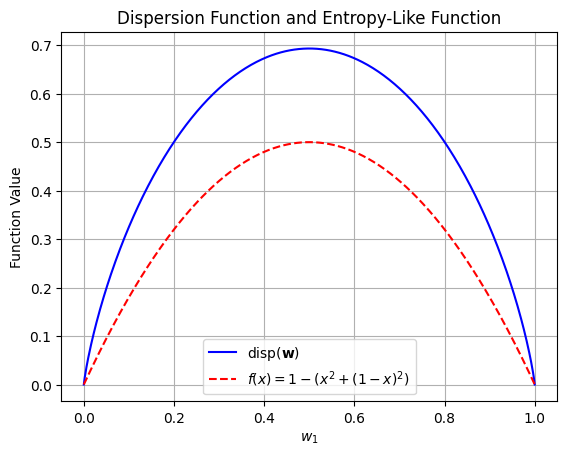

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dispersion function
def dispersion(w1):
    w2 = 1 - w1
    if w1 == 0 or w2 == 0:  # Handle cases where log(0) might occur
        return 0
    return -(w1 * np.log(w1) + w2 * np.log(w2))

# Entropy-like function
def entropy_like(w1):
    return 1 - (w1**2 + (1-w1)**2)

# Generate values for w1 ranging from 0 to 1
w1_values = np.linspace(0, 1, 500)
disp_values = [dispersion(w1) for w1 in w1_values]
entropy_values = [entropy_like(w1) for w1 in w1_values]

# Plotting the functions
plt.plot(w1_values, disp_values, label=r'$\text{disp}(\mathbf{w})$', color='blue')
plt.plot(w1_values, entropy_values, label=r'$f(x) = 1 - (x^2 + (1-x)^2)$', color='red', linestyle='--')

# Plot details
plt.xlabel(r'$w_1$')
plt.ylabel('Function Value')
plt.title('Dispersion Function and Entropy-Like Function')
plt.grid(True)
plt.legend()
plt.show()


### Gini Index Definition

The Gini Index is a measure of statistical dispersion used to evaluate the purity or impurity of a set. It's calculated as:

$$
\text{Gini Index} = 1 - \sum_{i=1}^{j} p_i^2
$$

Where:
- $ j $ represents the number of classes in the target variable. For a binary classification problem, $ j = 2 $.
- $ p_i $ represents the proportion of instances in class $ i $ at a given node.

### Gini Index for binary state

For a binary problem (e.g., Pass/Fail), the Gini Index simplifies to:

$$
\text{Gini Index} = 1 - (p_{\text{Pass}}^2 + p_{\text{Fail}}^2)
$$

$$
\text{Gini Index} =1-(x^2+(1-x)^2)
$$


## Homework: Complete dispersion analysis for weight control in OWA